<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml14_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습(Unsupervised Learning)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Datasets

[Fruist 360](https://www.kaggle.com/datasets/moltean/fruits): 140,340개의 과일/채소/견과류 이미지

In [5]:
!wget https://bit.ly/fruits_300 -O fruits.npy

--2025-08-18 01:06:53--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-08-18 01:06:53--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-08-18 01:06:53--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

*   Jupyter 노트북에서 Linux 명령어를 실행할 때 `!`로 시작.
*   `wget URL주소 -O 파일이름`: URL주소의 파일을 다운로드 받아서 '파일이름'으로 저장.
*   확장자 npy 파일: numpy 배열을 저장한 바이너리 파일.

In [6]:
fruits = np.load('fruits.npy')  # npy 형식의 파일을 읽어서 numpy 배열을 만듦.

In [7]:
fruits.shape  #> (300, 100, 100) -> (samples, width, height)

(300, 100, 100)

100x100 크기의 흑백 이미지 300개를 numpy 배열로 저장한 데이터셋.

## 데이터 시각화

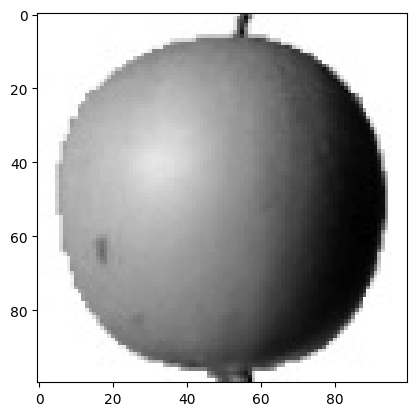

In [11]:
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

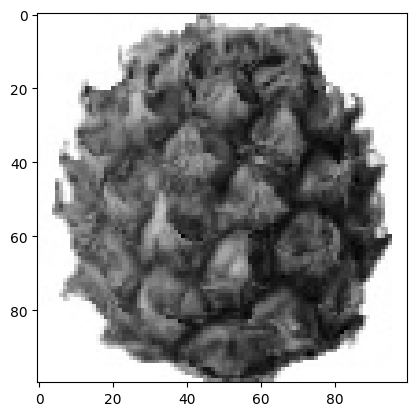

In [12]:
plt.imshow(fruits[100], cmap=plt.cm.binary)
plt.show()

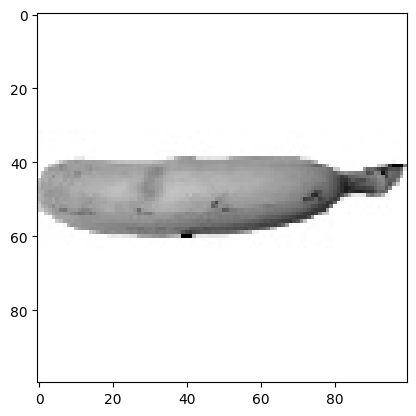

In [13]:
plt.imshow(fruits[200], cmap=plt.cm.binary)
plt.show()

첫 100개의 이미지를 10개 행, 10개 열로 배치해서 그려보세요.

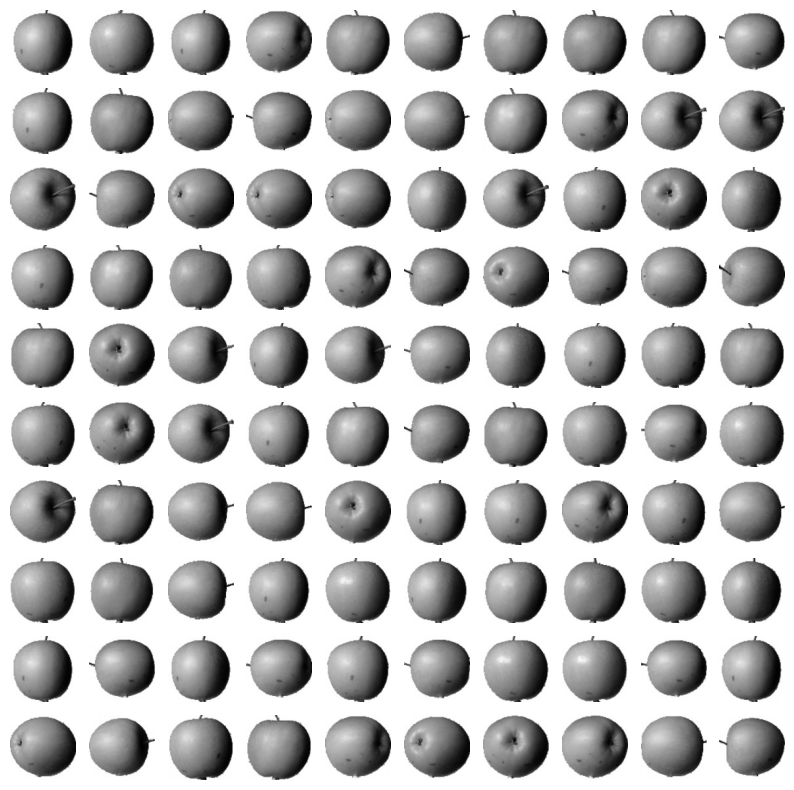

In [18]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

for row in range(10):
    for col in range(10):
        ax[row, col].imshow(fruits[row * 10 + col], cmap=plt.cm.binary)
        ax[row, col].axis('off')

plt.show()

In [19]:
def plot_fruits(n_row=10, n_col=10, start=0):
    fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(10, 10))
    for row in range(n_row):
        for col in range(n_col):
            ax[row, col].imshow(fruits[start + row * 10 + col], cmap=plt.cm.binary)
            ax[row, col].axis('off')

    plt.show()

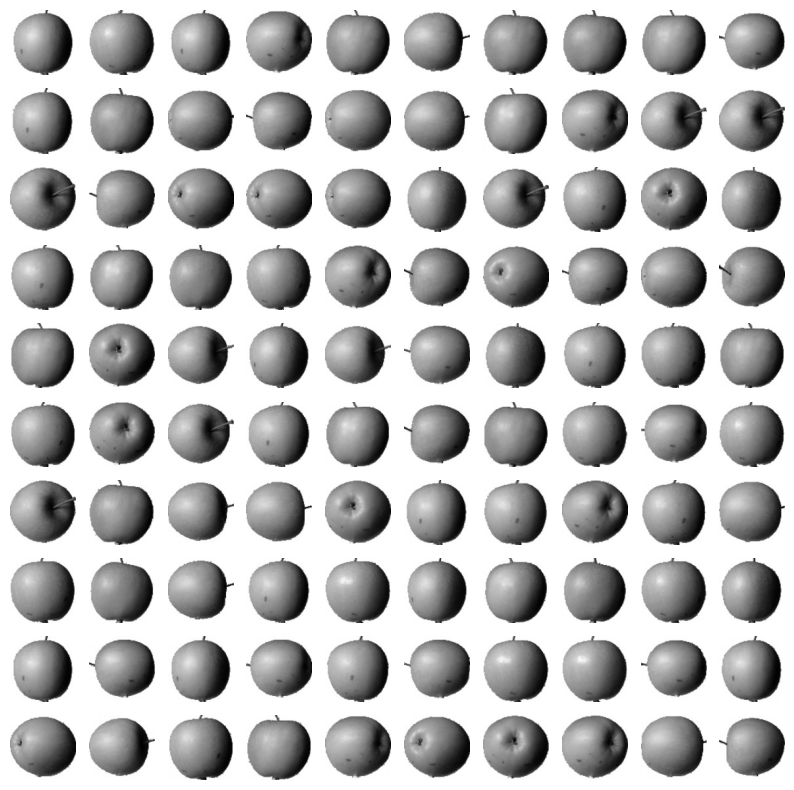

In [20]:
plot_fruits()

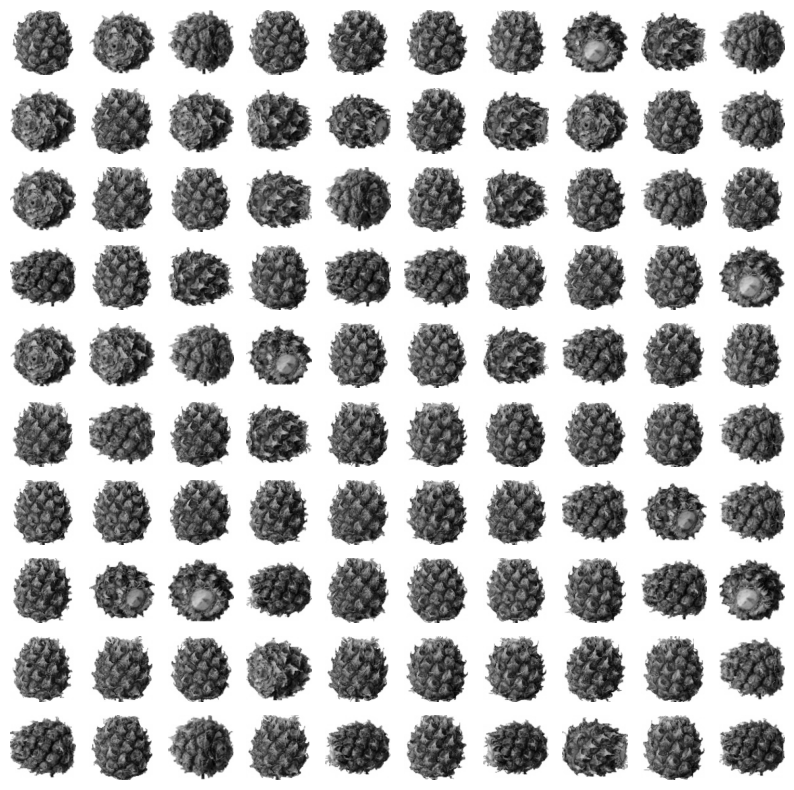

In [21]:
plot_fruits(start=100)

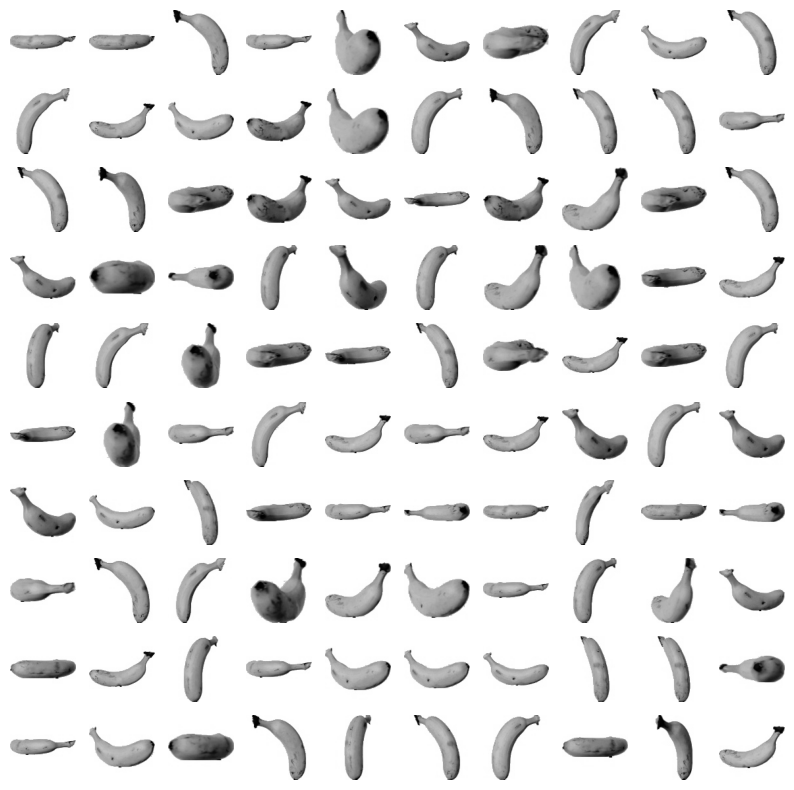

In [22]:
plot_fruits(start=200)

# 이미지 Pixel 분석

(samples, width, height) shape의 3차원 배열을 (samples, width x height) shape의 2차원 배열로 변환

In [23]:
fruits_2d = fruits.reshape((300, -1))  # (300, 100 * 100)

In [24]:
fruits_2d.shape

(300, 10000)

In [34]:
apples = fruits_2d[:100]  # 사과 이미지
pineapples = fruits_2d[100:200]  # 파인애플 이미지
bananas = fruits_2d[200:]  # 바나나 이미지

## 각 샘플에서 모든 픽셀의 평균값

In [35]:
apples.shape

(100, 10000)

In [36]:
apple_means = apples.mean(axis=1)

In [37]:
print(apple_means)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [38]:
pineapple_means = pineapples.mean(axis=1)
banana_means = bananas.mean(axis=1)

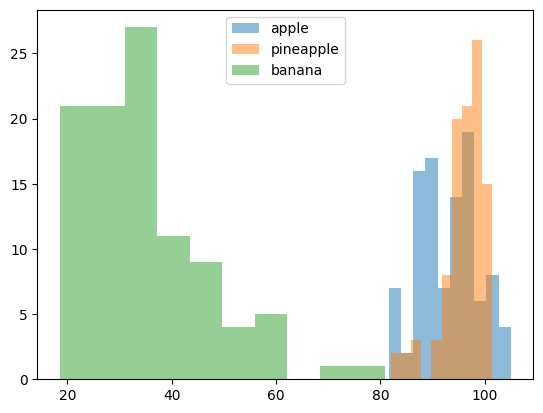

In [39]:
plt.hist(apple_means, alpha=0.5, label='apple')
plt.hist(pineapple_means, alpha=0.5, label='pineapple')
plt.hist(banana_means, alpha=0.5, label='banana')

plt.legend()
plt.show()

## 각 픽셀의 평균

In [43]:
apple_px_means = apples.mean(axis=0)
pineapple_px_means = pineapples.mean(axis=0)
banana_px_means = bananas.mean(axis=0)

In [44]:
print(apple_px_means.shape)
print(pineapple_px_means.shape)
print(banana_px_means.shape)

(10000,)
(10000,)
(10000,)


픽셀 평균들의 막대 그래프

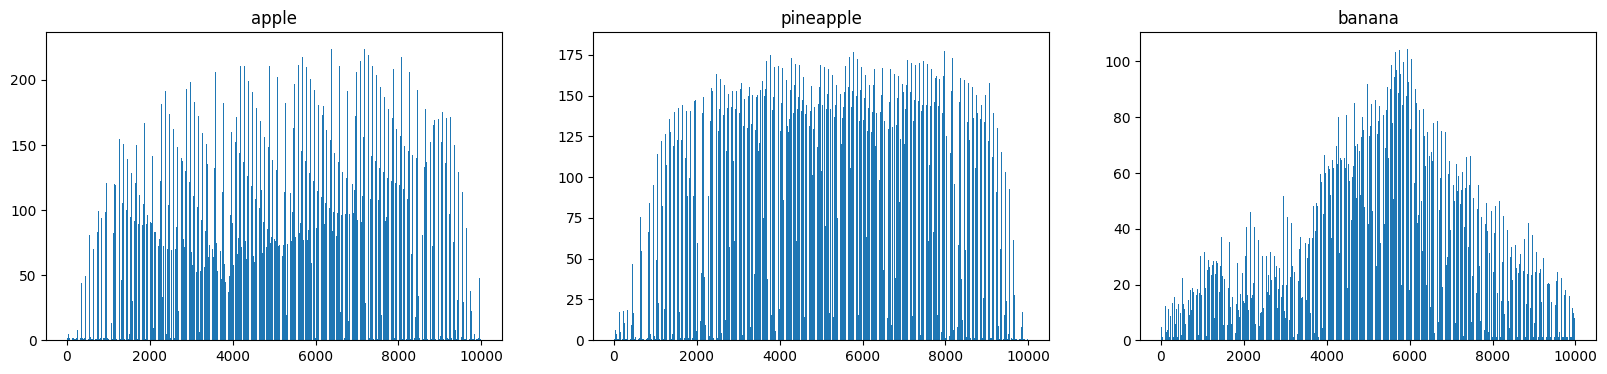

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
x = range(10_000)
ax[0].bar(x, apple_px_means)
ax[0].set_title('apple')
ax[1].bar(x, pineapple_px_means)
ax[1].set_title('pineapple')
ax[2].bar(x, banana_px_means)
ax[2].set_title('banana')
plt.show()

각 픽셀의 평균값(1차원 배열)을 100x100 이미지(2차원 배열)로 생각해서 시각화

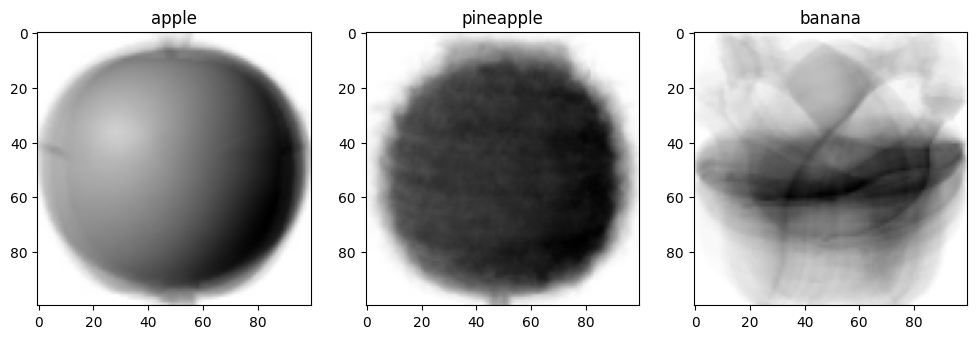

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].imshow(apple_px_means.reshape((100, 100)), cmap=plt.cm.binary)
ax[0].set_title('apple')
ax[1].imshow(pineapple_px_means.reshape((100, 100)), cmap=plt.cm.binary)
ax[1].set_title('pineapple')
ax[2].imshow(banana_px_means.reshape((100, 100)), cmap=plt.cm.binary)
ax[2].set_title('banana')
plt.show()

## 각 픽셀의 평균값들과 가까운 이미지 찾기

In [52]:
fruits.shape

(300, 100, 100)

In [53]:
apple_px_means.shape

(10000,)

In [54]:
diff = np.abs(fruits - apple_px_means.reshape((100, 100)))

In [55]:
diff.shape

(300, 100, 100)

In [56]:
diff_mean = np.mean(diff, axis=(1, 2))

In [57]:
diff_mean.shape

(300,)

In [58]:
# 사과 픽셀 평균값과 차이가 작은 순서로 100개의 인덱스
apple_like_idx = np.argsort(diff_mean)[:100]
print(apple_like_idx)

[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


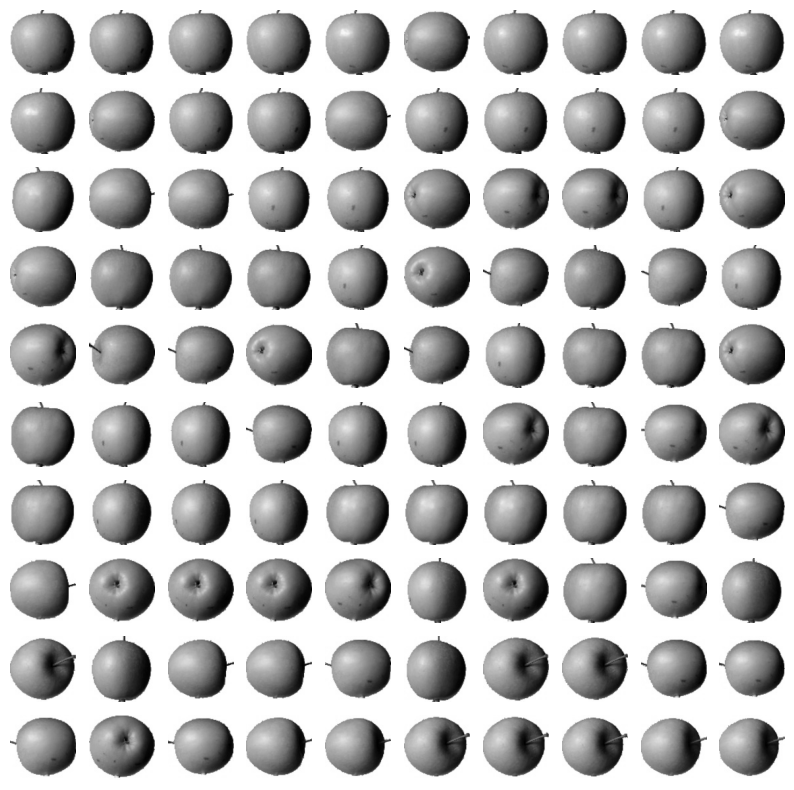

In [59]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for row in range(10):
    for col in range(10):
        img = fruits[apple_like_idx[row * 10 + col]]
        ax[row, col].imshow(img, cmap=plt.cm.binary)
        ax[row, col].axis('off')

plt.show()